In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# MLP - XOR Gate
def feed_forward(x, w1, b1, w2, b2, train = True):
    Z = tf.matmul(x,w1) + b1
    Z1 = tf.nn.sigmoid(Z)
    Z2 = tf.matmul(Z1,w2) + b2
    if train:
        return Z2
    return tf.nn.sigmoid(Z2)

In [4]:
# w1 = random number 
# Geneartes random weights (w1 & w2)
# np.random.randn()
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev = 0.1))

In [5]:
X = np.array([[0 , 0], [0 , 1], [1, 0], [1, 1]])
Y = np.array([[0],[1], [1], [0]])

In [6]:
# placeholders for X & Y
# [None,2] - None = rows, 2 = Columns
# [None,1] - None = rows, 1 = Column
X_var = tf.placeholder(tf.float32, [None , 2])
Y_var = tf.placeholder(tf.float32, [None , 1])
# 2 = input , 5 = number of neurons for input
w1 = init_weights([2, 5])
b1 = init_weights([5])
# 5 = number of neurons , 1 = output-layer
w2 = init_weights([5, 1])
b2 = init_weights([1])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# Return Z2
y_hat = feed_forward(X_var, w1, b1, w2, b2)
#test
pred = feed_forward(X_var, w1, b1, w2, b2, False) 

Iteration 0 Cost 0.69489586353302
Iteration 100 Cost 0.051243916153907776
Iteration 200 Cost 0.008117902092635632
Iteration 300 Cost 0.003946639597415924
Iteration 400 Cost 0.0024267069529742002
Training Complete
Percentages: 
[[6.5287948e-04]
 [9.9871528e-01]
 [9.9871790e-01]
 [3.4872293e-03]]
Prediction: 
[[0.]
 [1.]
 [1.]
 [0.]]


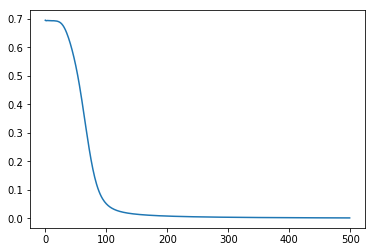

In [8]:
# Learning Rate
learning_rate = 0.05
epochs = 500
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
    logits=y_hat, labels = Y_var))
# Fast learning rate
train = tf.train.AdamOptimizer(learning_rate).minimize(cost)
costs = []
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
# start training
for i in range(epochs):
    sess.run(train, feed_dict = {X_var: X, Y_var: Y})
    c = sess.run(cost, feed_dict = {X_var: X, Y_var: Y})
    costs.append(c)
    if i % 100==0:
        print(f"Iteration {i} Cost {c}") 
print("Training Complete")
prediction = sess.run(pred, feed_dict={X_var:X})
print("Percentages: ")
print(prediction)
print("Prediction: ")
print(np.round(prediction))
plt.plot(costs)
plt.show()

In [10]:
np.round(prediction)

array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32)